In [69]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')

In [8]:
bc_df = pd.read_csv('../data/processed/British Columbia_combined.csv', index_col='Date', parse_dates=['Date'], )
bc_df.head()

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm,mortality_rate
Date,,,,,,,,,,,
2020-01-22,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [24]:
end_date = bc_df.index.max().date()
start_date = "2021-01-11"
daily_deaths = bc_df[start_date:end_date]['daily_deaths']
daily_deaths

Date
2021-01-11    22.0
2021-01-12     9.0
2021-01-13    12.0
2021-01-14     7.0
2021-01-15     9.0
              ... 
2022-01-16     0.0
2022-01-17    22.0
2022-01-18     2.0
2022-01-19    13.0
2022-01-20    15.0
Name: daily_deaths, Length: 375, dtype: float64

In [38]:
# univariate lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
raw_seq = daily_deaths 
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
#x_input = array([70, 80, 90])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

In [57]:
forecast_days = 10
forecasts = []
x_input = array(daily_deaths[-7:])
for i in range(forecast_days):
    x_input_nd = x_input.reshape((1, n_steps, n_features))
    forecast = model.predict(x_input_nd, verbose=0)
    forecasts.append(forecast[0][0])
    x_input = np.append(np.delete(x_input, 0), array(forecast[0][0]))
forecasts

[7.683989,
 1.8309338,
 1.6313413,
 5.517598,
 -0.6068453,
 -0.042795032,
 10.737137,
 -0.017385527,
 3.7365544,
 6.5751047]

In [58]:
daily_deaths = bc_df[start_date:end_date]['daily_deaths'].tolist()
daily_deaths

[22.0,
 9.0,
 12.0,
 7.0,
 9.0,
 0.0,
 0.0,
 31.0,
 12.0,
 14.0,
 15.0,
 9.0,
 0.0,
 0.0,
 26.0,
 14.0,
 4.0,
 12.0,
 5.0,
 0.0,
 0.0,
 21.0,
 8.0,
 16.0,
 6.0,
 6.0,
 0.0,
 0.0,
 13.0,
 4.0,
 6.0,
 9.0,
 10.0,
 0.0,
 0.0,
 0.0,
 26.0,
 3.0,
 4.0,
 6.0,
 0.0,
 0.0,
 8.0,
 1.0,
 2.0,
 10.0,
 7.0,
 0.0,
 0.0,
 8.0,
 2.0,
 7.0,
 4.0,
 4.0,
 0.0,
 0.0,
 11.0,
 2.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 10.0,
 0.0,
 4.0,
 8.0,
 2.0,
 0.0,
 0.0,
 16.0,
 1.0,
 3.0,
 5.0,
 3.0,
 0.0,
 0.0,
 6.0,
 0.0,
 3.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 26.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 18.0,
 2.0,
 6.0,
 3.0,
 6.0,
 0.0,
 0.0,
 8.0,
 1.0,
 7.0,
 4.0,
 4.0,
 0.0,
 0.0,
 17.0,
 0.0,
 5.0,
 1.0,
 4.0,
 0.0,
 0.0,
 15.0,
 1.0,
 0.0,
 1.0,
 7.0,
 0.0,
 0.0,
 20.0,
 2.0,
 3.0,
 5.0,
 2.0,
 0.0,
 0.0,
 14.0,
 2.0,
 8.0,
 3.0,
 6.0,
 0.0,
 0.0,
 0.0,
 13.0,
 3.0,
 7.0,
 2.0,
 0.0,
 0.0,
 11.0,
 0.0,
 4.0,
 2.0,
 1.0,
 0.0,
 0.0,
 12.0,
 0.0,
 3.0,
 4.0,
 1.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 1.0,
 1.0,
 0.0,
 0.0,
 3.0,
 

In [49]:
x_input = array(daily_deaths[-7:])
x_input_nd = x_input.reshape((1, n_steps, n_features))
x_input_nd

array([[[ 6.],
        [ 0.],
        [ 0.],
        [22.],
        [ 2.],
        [13.],
        [15.]]])

In [42]:
forecast = model.predict(x_input_nd, verbose=0)

In [50]:
forecast[0][0]

7.683989

In [51]:
x_input = np.append(np.delete(x_input, 0), array(forecast[0][0]))

In [52]:
x_input

array([ 0.        ,  0.        , 22.        ,  2.        , 13.        ,
       15.        ,  7.68398905])

In [61]:
bc_deaths = pd.read_csv('../data/processed/British Columbia_combined.csv', index_col='Date', parse_dates=['Date'], usecols=['Date', 'daily_deaths'])
bc_deaths

,daily_deaths
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2022-01-16,0.0
2022-01-17,22.0
2022-01-18,2.0


<AxesSubplot:xlabel='Date'>

<Figure size 1152x576 with 0 Axes>

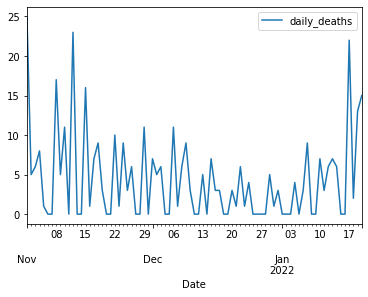

In [66]:
plt.figure(figsize=(16,8))
bc_deaths['2021-11-01':].plot()

<Figure size 432x288 with 0 Axes>

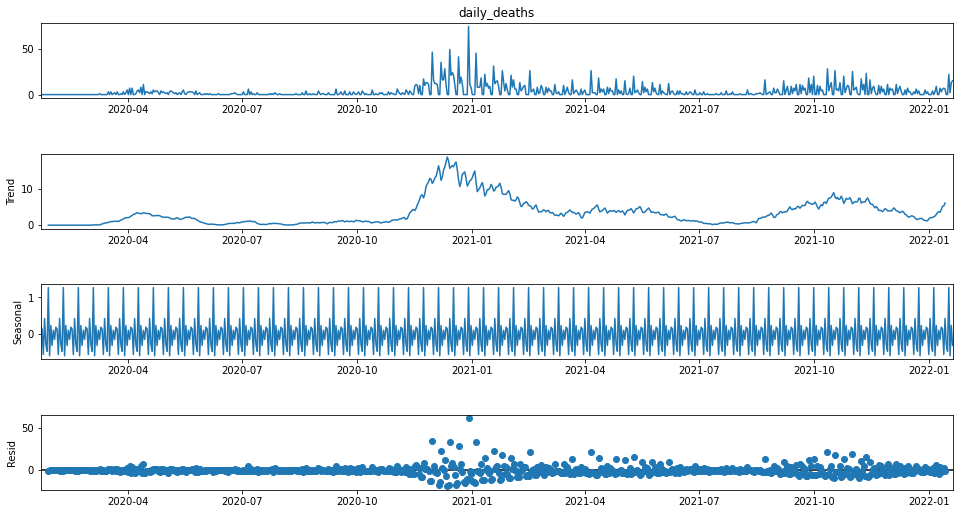

In [70]:
decomposition = seasonal_decompose(bc_deaths.daily_deaths, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [76]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    ewm_avg = timeseries.ewm(alpha=0.3, adjust=False).mean()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    ewm = plt.plot(ewm_avg, color='orange', label = 'ewm')
    plt.legend(loc='best')
    plt.title('Rolling Mean, Standard Deviation and ewm')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

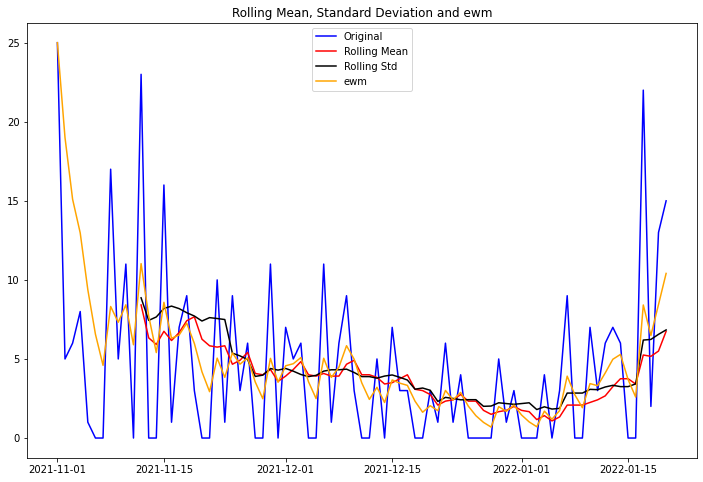

Results of Dickey-Fuller Test:
Test Statistic                 -0.647037
p-value                         0.859995
#Lags Used                      6.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [78]:
subset=bc_deaths['2021-11-01':]
test_stationarity(subset.daily_deaths)

In [80]:
dataset = bc_deaths.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

694

In [82]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [83]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01351351, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04054054,
       0.        , 0.04054054, 0.        , 0.01351351, 0.02702703])]
[0.0]

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.      

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

634/634 [==============================] - 44s 69ms/sample - loss: 0.0082


In [86]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.506602905921099

In [88]:
# Plot the data
train = bc_deaths[:training_data_len]
valid = bc_deaths[training_data_len:]
valid['Predictions'] = predictions


In [90]:
valid

,daily_deaths,Predictions
Date,,
2021-12-16,3.0,4.325233
2021-12-17,3.0,4.086336
2021-12-18,0.0,3.935135
2021-12-19,0.0,3.903299
2021-12-20,3.0,3.865381
2021-12-21,1.0,3.710702
2021-12-22,6.0,3.570750
2021-12-23,1.0,3.343653
2021-12-24,4.0,3.295958


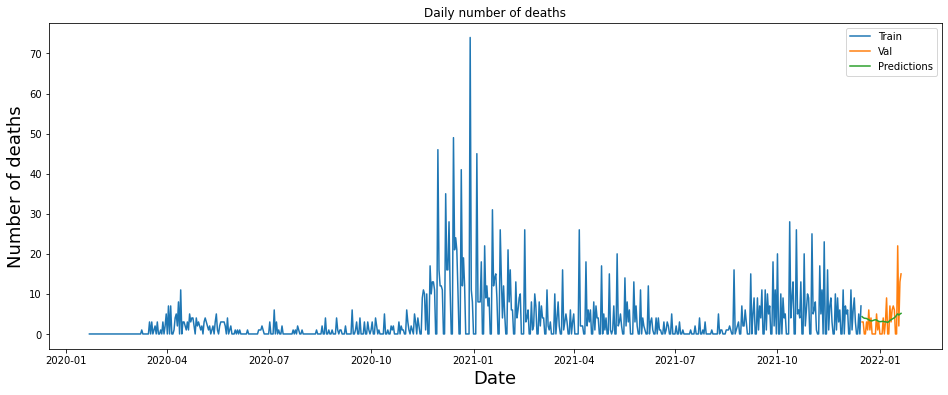

In [93]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Daily number of deaths')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of deaths', fontsize=18)
plt.plot(train['daily_deaths'])
plt.plot(valid[['daily_deaths', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()